# `wisesight-sentiment` Exploration by [@lukkiddd](https://github.com/lukkiddd)

This notebook perform an exploration of the `wisesight-sentiment` dataset which was provided by **Wisesight (Thailand) Co., Ltd**. It contains 28,070 texts with 4 categories (**q**uestion, **neu**tral, **neg**ative, and **pos**itive). For more detail about the data you can read at `README.md` file.


- Read file
- Number of tokens distribution
- TF-IDF
    - Words
    - Emojis
    - Punc
    - URL
    - Hashtags

In [7]:
import re
import pandas as pd
from tqdm import tqdm_notebook
import codecs

from pythainlp.tokenize import word_tokenize

#viz
from matplotlib import pyplot as plt
import seaborn as sns

#params
pd.set_option("max_colwidth", 0)
sns.set_context("talk")
sns.set_palette(sns.color_palette("colorblind", 10))

%matplotlib inline

# Reading data

In [66]:
#train.csv
texts = []
labels = []
with codecs.open('train.txt', encoding='utf-8') as f:
    for line in f.read().split('\n'):
        texts.append(line.strip())
f.close()
with open(f"train_label.txt") as f:
    for line in f.read().splitlines():
        labels.append(line)
f.close()
df = pd.DataFrame({'category':labels,'texts':texts[:-1]})
df.to_csv('train.csv',index=False)
df.shape

(24345, 2)

In [67]:
#test.csv
texts = []
labels = []
with codecs.open('test.txt', encoding='utf-8') as f:
    for line in f.read().split('\n'):
        texts.append(line.strip())
f.close()

test_df = pd.DataFrame({'category': 'neu','texts':texts[:-1]})
test_df.to_csv('test.csv',index=False)
test_df.shape

(3946, 2)

In [23]:
df.describe()

category                 texts
count   24345    24345               
unique  4        24183               
top     neu      ‡πÅ‡∏•‡πâ‡∏ß‡πÇ‡∏õ‡∏£‡∏ß‡∏±‡∏ô‡∏û‡πà‡∏≠‡∏≠‡∏∞‡πÑ‡∏£‡∏Ñ‡πà‡∏∞
freq    14243    2

In [24]:
df.groupby("category").describe()

texts         \
          count unique   
category                 
neg       5713   5713    
neu       14243  14243   
pos       3917   3917    
q         472    472     

                                                                                                     \
                                                                                                top   
category                                                                                              
neg       ‡∏°‡∏≤‡πÄ‡∏´‡∏≠‡∏∞ ‡πÅ‡∏™‡∏á‡πÇ‡∏™‡∏°‡∏Å‡∏±‡∏ö‡πÄ‡∏ö‡∏µ‡∏¢‡∏£‡πå‡∏ä‡πâ‡∏≤‡∏á‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ï‡∏µ‡πÑ‡∏≠‡πÄ‡∏´‡∏µ‡πâ‡∏¢55555                                               
neu       ‡∏ó‡∏µ‡∏°‡∏ô‡∏∂‡∏á‡πÄ‡∏ö‡∏µ‡∏¢‡∏£‡πå‡∏ä‡πâ‡∏≤‡∏á ‡∏≠‡∏µ‡∏Å‡∏ó‡∏µ‡∏°‡∏Å‡πá‡∏•‡∏µ‡πÇ‡∏≠ ‡πÄ‡∏°‡∏≤‡πÄ‡∏•‡∏∞‡πÄ‡∏•‡∏¢‡∏á‡∏≤‡∏ô‡∏ô‡∏µ‡πâ‡∏´‡∏ô‡πâ‡∏≤‡∏™‡∏ô‡∏≤‡∏°‡πÅ‡∏°‡∏£‡πà‡∏á‡∏ï‡∏±‡πâ‡∏á‡πÄ‡∏ï‡πä‡∏ô‡∏ó‡πå‡∏Ç‡∏≤‡∏¢‡πÄ‡∏ö‡∏µ‡∏¢‡∏£‡πå‡∏Å‡∏±‡∏ô‡πÅ‡∏£‡∏∞ ‡∏™‡∏≤‡∏™‡∏™‡∏™   
pos       ‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏î‡∏µ‡πÑ‡∏°‡πà‡πÄ‡∏õ‡∏ô‡∏ô‡∏¥‡πà‡∏ß                                                                           
q         ‡∏û‡∏µ‡πà‡∏°‡∏î‡∏Ñ‡∏∞ ‡πÅ‡∏õ‡πâ‡∏á nars ‡∏™‡∏µ orgusm ‡∏™‡∏ß‡∏¢‡πÑ‡∏´‡∏°‡∏Ñ‡∏∞                                                        

               
         freq  
category       
neg       1    
neu       1    
pos       1    
q         1

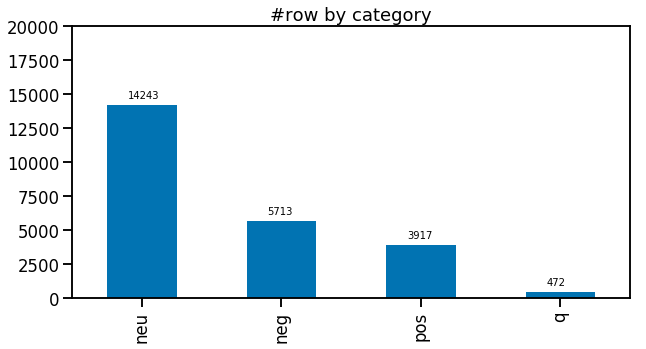

In [25]:
row_count_by_category = df.category.value_counts()
ax = row_count_by_category.plot("bar", title="#row by category", figsize=(10, 5))
ax.set_ylim(0, 20000)
for i, label in enumerate(row_count_by_category):
    ax.annotate(str(label), (i-0.1, label + 500))

# Text length

In [26]:
df['length'] = df['texts'].apply(word_tokenize).apply(len)
df.head()

category  \
0  neu       
1  neg       
2  neu       
3  neu       
4  neu       

                                                                                                                                                                                                                                                                                                                                                                                                                              texts  \
0  10 ‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏ä‡∏ô‡πå‡∏Ç‡∏≠‡∏á‡∏Æ‡∏±‡∏ö‡∏°‡∏∞‡∏Å‡∏≠‡∏Å ‡πÄ‡∏Å‡∏£‡∏î A ‡∏à‡∏≤‡∏Å‡∏ï‡∏∏‡∏£‡∏Å‡∏µ 1. ‡∏ä‡πà‡∏ß‡∏¢‡∏£‡∏±‡∏Å‡∏©‡∏≤‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô 2. ‡∏ä‡πà‡∏ß‡∏¢‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô ‡πÅ‡∏•‡∏∞‡∏£‡∏±‡∏Å‡∏©‡∏≤‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à 3. ‡∏ä‡πà‡∏ß‡∏¢‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô ‡πÅ‡∏•‡∏∞‡∏£‡∏±‡∏Å‡∏©‡∏≤‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á 4. ‡∏ä‡πà‡∏ß‡∏¢‡∏ö‡∏≥‡∏£‡∏∏‡∏á‡∏ú‡∏¥‡∏ß‡∏û‡∏£‡∏£‡∏ì‡πÅ‡∏ö‡∏ö Inside-Out 5. ‡∏ä‡πà‡∏ß‡∏¢‡∏ö‡∏≥‡∏£‡∏∏‡∏á‡∏™‡∏°‡∏≠‡∏á ‡πÅ‡∏•‡∏∞‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡πÇ‡∏£‡∏Ñ‡∏≠‡∏±‡∏•‡πÑ‡∏ã‡πÄ‡∏°‡∏≠‡∏£‡πå 6. ‡∏ä‡πà‡∏ß‡∏¢‡∏•‡∏∞‡∏•‡∏≤‡∏¢‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡πÉ‡∏ô‡∏£‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏¢ 7. ‡∏ä‡πà‡∏ß‡∏¢‡∏Å‡∏≥‡∏à‡∏±‡∏î‡πÅ‡∏ö‡∏Ñ‡∏ó‡∏µ‡πÄ‡∏£‡∏µ‡∏¢‡πÅ‡∏•‡∏∞‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡∏£‡∏≤‡πÉ‡∏ô‡∏£‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏¢ 8. ‡∏ä‡πà‡∏ß‡∏¢‡∏£‡∏±‡∏Å‡∏©‡∏≤‡πÇ‡∏£‡∏Ñ‡πÉ‡∏ô‡∏ó‡πâ‡∏≠‡∏á ‡πÄ‡∏ä‡πà‡∏ô‡∏ó‡πâ‡∏≠‡∏á‡πÄ‡∏™‡∏µ‡∏¢ ‡∏´‡∏£‡∏∑‡∏≠‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏© 9. ‡∏ä‡πà‡∏ß‡∏¢‡∏ö‡∏£‡∏£‡πÄ‡∏ó‡∏≤‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡∏õ‡∏ß‡∏î‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏¢ ‡πÅ‡∏•‡∏∞‡∏£‡∏±‡∏Å‡∏©‡∏≤‡πÇ‡∏£‡∏Ñ‡πÄ‡∏´‡∏ô‡πá‡∏ö‡∏ä‡∏≤ 10. ‡∏ä‡πà‡∏ß‡∏¢‡∏£‡∏±‡∏Å‡∏©‡∏≤‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡∏†‡∏π‡∏°‡∏¥‡πÅ‡∏û‡πâ ‡πÅ‡∏•‡∏∞‡πÇ‡∏£‡∏Ñ‡πÑ‡∏ã‡∏ô‡∏±‡∏™   
1  ‡∏Ç‡∏±‡∏ö‡∏≠‡∏±‡∏•‡∏ï‡∏¥‡∏™1.8/141‡∏°‡πâ‡∏≤ ‡∏ö‡∏≤‡∏á‡∏ó‡∏µ‡πÄ‡∏à‡∏≠‡∏Å‡∏∞‡∏ö‡∏∞‡∏Å‡∏∞‡∏û‡∏£‡∏¥‡∏ö‡πÑ‡∏ü‡πÉ‡∏£‡πà‡∏ï‡∏≤‡∏°‡∏´‡∏•‡∏±‡∏á ‡∏´‡∏£‡∏∑‡∏≠‡∏ö‡∏≤‡∏á‡∏ó‡∏µ‡∏Å‡∏∞‡∏ö‡∏∞‡πÅ‡∏Ç‡πà‡∏á‡∏Å‡∏±‡∏ô‡∏°‡∏≤‡∏û‡∏≠‡πÄ‡∏£‡∏≤‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏î‡∏π‡∏°‡∏±‡πà‡∏á‡πÑ‡∏°‡πà‡πÄ‡∏´‡πá‡∏ô‡πÉ‡∏Ñ‡∏£‡∏ï‡∏≤‡∏°‡∏°‡∏≤‡πÄ‡∏•‡∏¢ ‡∏û‡∏≠‡πÑ‡∏õ‡πÄ‡∏à‡∏≠‡πÄ‡∏£‡∏≤‡∏ó‡∏µ‡πà‡∏õ‡∏±‡πâ‡∏°‡∏°‡∏µ‡πÅ‡∏≠‡∏ö‡∏°‡∏≠‡∏á‡∏î‡πâ‡∏ß‡∏¢                                                                                                                                                                                                                                                                                          
2  ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ‡∏Å‡∏±‡∏ô‡πÑ‡∏õ‡∏ô‡∏≤‡∏ô‡πÜ‡∏ô‡∏∞ ‡∏≠‡∏¢‡∏π‡πà‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô‡πÉ‡∏ô‡πÄ‡∏´‡∏á‡∏≤ ‡∏≠‡∏¢‡∏π‡πà‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏ü‡∏ô‡πÉ‡∏ô‡∏≠‡∏¢‡∏≤‡∏°‡∏ß‡πà‡∏≤‡∏á ‡∏≠‡∏¢‡∏π‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏û‡πà‡∏≠‡∏Ñ‡∏£‡∏±‡∏ß‡πÉ‡∏ô‡∏¢‡∏≤‡∏°‡∏Å‡∏π‡∏´‡∏¥‡∏ß ‡∏≠‡∏¢‡∏π‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏û‡πà‡∏≠-‡πÅ‡∏°‡πà‡πÉ‡∏ô‡∏¢‡∏≤‡∏°‡∏Å‡∏π‡∏´‡∏±‡∏ß‡∏£‡πâ‡∏≠‡∏ô ‡πÅ‡∏•‡πâ‡∏ß‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà 31 ‡πÄ‡∏à‡∏≠‡∏Å‡∏±‡∏ô‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà 31 ‡∏ò‡∏±‡∏ô‡∏ß‡∏≤‡∏ô‡∏µ‡πâ >> ‡∏≠‡∏¢‡∏≤‡∏Å‡∏≠‡∏¢‡∏π‡πà‡∏Å‡∏±‡∏ö‡∏Ñ‡∏ô‡∏û‡∏¥‡πÄ‡∏®‡∏© ‡∏û‡∏¥‡πÄ‡∏®‡∏©‡πÉ‡∏ô‡∏Ñ‡∏∑‡∏ô‡∏Ç‡πâ‡∏≤‡∏°‡∏õ‡∏µ (‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏£‡∏≤‡πÑ‡∏õ‡∏™‡∏ß‡∏î‡∏°‡∏ô‡∏ï‡πå‡∏Ç‡πâ‡∏≤‡∏°‡∏õ‡∏µ‡πÅ‡∏ó‡∏ô ‡∏Æ‡πà‡∏≤) #‡∏ä‡πâ‡∏≤‡∏á #chand #tbc2018                                                                                                                                                                
3  ‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏•‡∏µ‡∏¢‡∏ô‡πÅ‡∏ö‡∏ö mg3‡∏ä‡∏±‡∏î‡∏ä‡∏±‡∏î                                                                                                                                                                                                                                                                                                                                                                                                         
4  ,, ‡∏≠‡∏¢‡∏≤‡∏Å ‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡∏î‡∏µ‡∏Å‡∏±‡∏ö BLEND285 ‡∏à‡∏±‡∏á ‡πÄ‡∏•‡∏¢‡∏à‡πä‡∏∞‡∏û‡∏µ‡πà‡∏à‡πã‡∏≤                                                                                                                                                                                                                                                                       

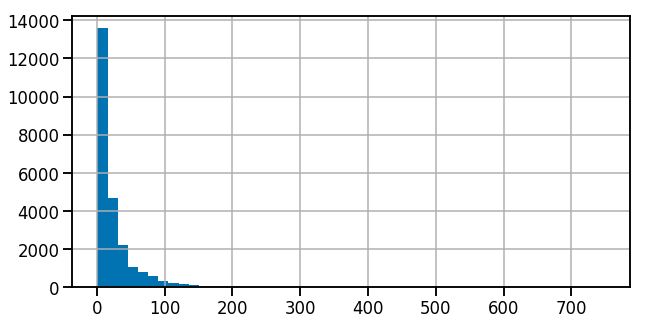

In [27]:
df['length'].hist(bins=50, figsize=(10, 5))

In [28]:
df['length'].describe()

count    24345.00000
mean     27.65648   
std      44.69065   
min      1.00000    
25%      6.00000    
50%      13.00000   
75%      30.00000   
max      749.00000  
Name: length, dtype: float64

In [31]:
df[df['length'] >= 749]

category  \
4184  neu       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               texts  \
4184  ‡πÅ‡∏•‡∏∞‡∏á‡∏≤‡∏ô‡πÉ‡∏´‡∏ç‡πà‡∏õ‡∏£‡∏∞‡∏à‡∏≥‡∏õ‡∏µ ‡∏ö‡πâ‡∏ï‡∏£ sold out ‡∏ó‡∏∏‡∏Å‡∏õ‡∏µ - ‡∏Ç‡∏≤‡∏¢‡∏ö‡∏±‡∏ï‡∏£‡πÅ‡∏•‡πâ‡∏ß!! ‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ß‡∏á LIPTA - ‡∏ñ‡∏∂‡∏á‡πÄ‡∏ß‡∏•‡∏≤‡∏£‡∏ß‡∏° ‡∏ä‡∏ô‡πÄ‡∏ú‡πà‡∏≤ Johnnie Walker present 20Something On The Beach 2018 "‡∏ä‡∏ô ‡πÄ‡∏ú‡πà‡∏≤ ‡πÄ‡∏°‡∏≤ ‡πÄ‡∏ï‡πâ‡∏ô" ‚ñ∂ THAITANIUM ‚ñ∂ UrboyTJ ‚ñ∂ COCKTAIL ‚ñ∂ MILD ‚ñ∂ LIPTA ‚ñ∂ MUSKETEERS X BETTERWEATHER ‚ñ∂ ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó‡∏Æ‡∏≤‡πÑ‡∏°‡πà‡∏à‡∏≥‡∏Å‡∏±‡∏î (‡∏ö‡∏≠‡∏•,‡∏Ñ‡πà‡∏≠‡∏°,‡∏ï‡∏±‡πä‡∏Å,‡πÇ‡∏£‡πÄ‡∏ö‡∏¥‡∏£‡πå‡∏ï ‡∏™‡∏≤‡∏¢‡∏Ñ‡∏ß‡∏±‡∏ô) ‚ñ∂ Dj Taidy Dj MMM Mc YongHulk ‚ñ∂ GiraffNoi / RAVEN DOLL PARTY ‡πÅ‡∏ö‡∏ö nonstop ‡πÑ‡∏°‡πà‡∏°‡∏µ dead air DJ ‡∏™‡∏•‡∏±‡∏ö ‡∏®‡∏¥‡∏•‡∏õ‡∏¥‡∏ô‡∏ï‡∏•‡∏≠‡∏î‡∏á‡∏≤‡∏ô @The Zign pattaya Sat 03/03/2018 16.00 - until late AGE : 18+ Dress Code : ‡∏ä‡∏ô‡πÄ‡∏ú‡πà‡∏≤ ----------------------------------------------- ‡∏á‡∏≤‡∏ô‡πÅ‡∏ö‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô 2 zone * Zone Regular : ‡∏≠‡∏¢‡∏π‡πà‡∏î‡πâ‡∏≤‡∏ô‡∏´‡∏•‡∏±‡∏á‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î‡πÄ‡∏ß‡∏ó‡∏µ ‡∏°‡∏µ‡πÇ‡∏ï‡πä‡∏∞‡πÉ‡∏´‡πâ‡∏ö‡∏≤‡∏á‡∏™‡πà‡∏ß‡∏ô ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á ‡∏°‡∏≤‡∏Å‡πà‡∏≠‡∏ô‡πÑ‡∏î‡πâ‡∏Å‡πà‡∏≠‡∏ô ‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏°‡∏µ‡∏û‡∏≠‡∏Å‡∏±‡∏ö‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô ‡πÄ‡∏Ç‡πâ‡∏≤ zone vip ‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ (‡∏ö‡∏±‡∏ï‡∏£‡∏ó‡∏∏‡∏Å‡∏£‡∏≤‡∏Ñ‡∏≤ free mixer all night) * Regular Ticket - Pre sale : 900 ‡∏ø - Door sale : 1,200 ‡∏ø * Regular Package : 4,900‡∏ø (‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ö‡∏∏‡πä‡∏Ñ‡πÇ‡∏ï‡πä‡∏∞ ‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÑ‡∏î‡πâ‡∏Å‡πà‡∏≠‡∏ô) - ‡∏´‡πâ‡∏≠‡∏á‡∏û‡∏±‡∏Å the zign 1 ‡∏´‡πâ‡∏≠‡∏á - ‡∏ö‡∏±‡∏ï‡∏£ regular 2 ‡πÉ‡∏ö - ‡∏ö‡∏±‡∏ï‡∏£‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡πÄ‡∏ä‡πâ‡∏≤ 2 ‡∏ó‡πà‡∏≤‡∏ô ‚Äî *Zone VIP : ‡∏≠‡∏¢‡∏π‡πà‡∏î‡πâ‡∏≤‡∏ô‡∏´‡∏ô‡πâ‡∏≤‡∏ï‡∏¥‡∏î‡πÄ‡∏ß‡∏ó‡∏µ Zone ‡∏ô‡∏µ‡πâ‡∏ó‡∏∏‡∏Å‡πÇ‡∏ï‡πä‡∏∞‡∏à‡∏∞‡∏ï‡πâ‡∏≠‡∏á‡∏à‡∏≠‡∏á‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡∏ô‡∏ó‡∏µ‡πà ‡∏ã‡∏∑‡πâ‡∏≠‡∏ö‡∏±‡∏ï‡∏£ vip ‡πÅ‡∏¢‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡πÉ‡∏ö‡πÜ ‡∏ï‡πâ‡∏≠‡∏á‡∏°‡∏µ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô‡∏à‡∏≠‡∏á‡πÇ‡∏ï‡πä‡∏∞‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô ‡πÑ‡∏°‡πà‡∏á‡∏±‡πâ‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ ‡∏Ñ‡∏∏‡∏ì‡∏à‡∏∞‡π

### Word length distribution

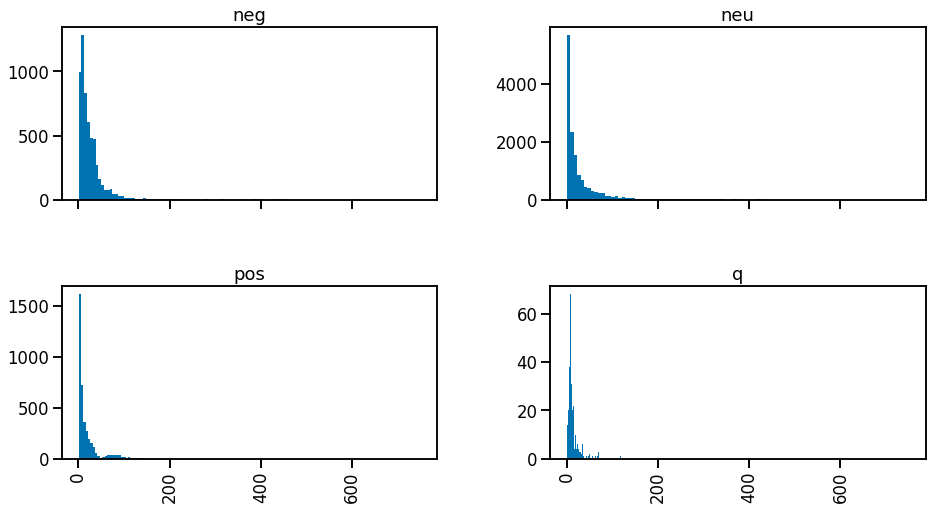

In [32]:
df.hist(column='length', by='category', bins=100, figsize=(15,8), sharex=True)
plt.show()

### Word length distribution (< 100)

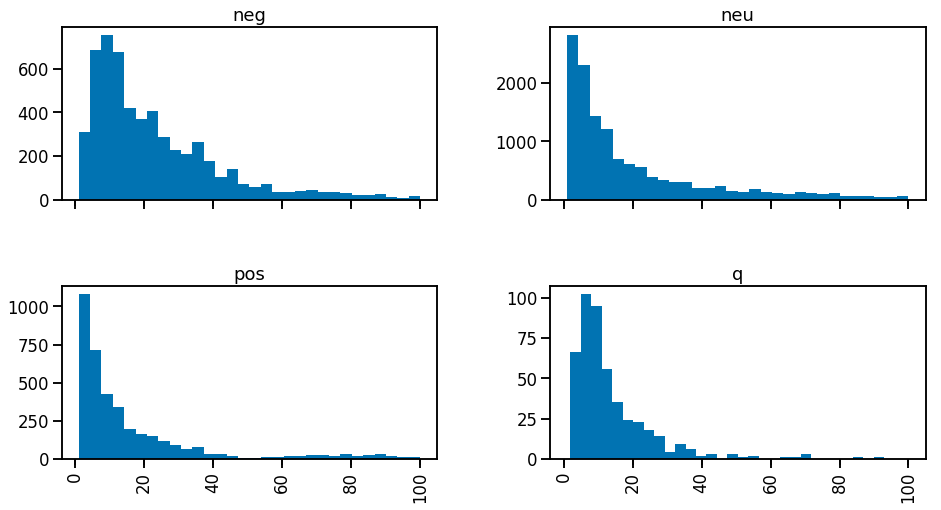

In [33]:
df[df['length'] <= 100].hist(column='length', by='category', bins=30, figsize=(15,8), sharex=True)
plt.show()

# Preprocess

In [34]:
def top_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'score']
    return df

In [35]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_feats(tfidf_means, features, top_n)

In [36]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [37]:
def plot_classfeats_h(dfs, score_name=''):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel(f"Mean {score_name} Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [38]:
def show_classfeats(df, vectorizer, analyzer, score_name='', text_col='texts', class_col='category', is_emoji=False):
    vec = vectorizer(analyzer=analyzer)
    mat = vec.fit_transform(df[text_col])
    dfs = top_feats_by_class(mat, df[class_col], vec.get_feature_names())
    if is_emoji:
        for dataframe in dfs:
            dataframe.columns = [dataframe.label, 'tfidf_' + dataframe.label]
        return pd.concat(dfs, axis=1)
    else:
        plot_classfeats_h(dfs, score_name=score_name)

In [40]:
import string
import emoji
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in word_tokenize(nopunc) if word and not re.search(pattern=r"\s+", string=word)]

def extract_url(text):
    URL_PATTERN = r"(https?:\/\/)?\.([\da-z-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S"
    return [url[1] for url in re.findall(pattern=URL_PATTERN, string=text.lower())]

def extract_emojis(str):
    return [c for c in str if c in emoji.UNICODE_EMOJI]

def extract_punc(text):
    return [char for char in text if char in string.punctuation]

def extract_hashtags(text):
    HASHTAG_PATTERN = r"#[a-zA-Z0-9‡∏Å-‡πô]+"
    return re.findall(pattern=HASHTAG_PATTERN, string=text)

## TF-IDF

### word

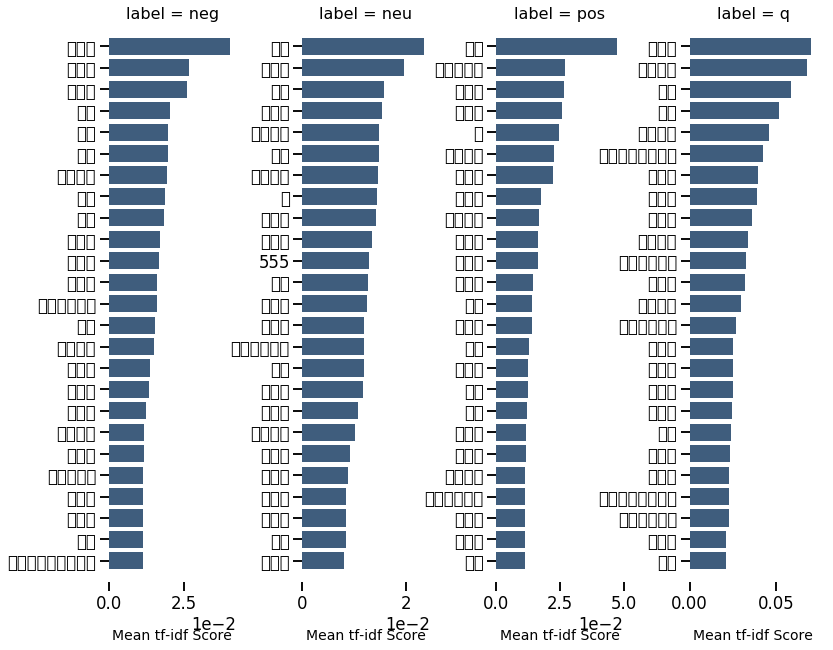

In [41]:
show_classfeats(
    df=df[:1000],
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

### emojis

In [42]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_emojis, is_emoji=True)

neg  tfidf_neg neu  tfidf_neu pos  tfidf_pos  q   tfidf_q
0   üòÇ   0.018295   üòÇ   0.009092   üòÇ   0.014057   üòÇ  0.009283
1   üò≠   0.010912   üòç   0.004942   üòç   0.009682   ü§î  0.004237
2   ü§£   0.003902   ‚ù§   0.004359   üòÅ   0.008336   üòç  0.004237
3   üòÖ   0.003066   üòÅ   0.004216   ‚ù§   0.005888   üò≠  0.004077
4   üôÑ   0.002750   ü§£   0.003759   üòò   0.005599   üëÄ  0.002119
5   üò¢   0.002537   üôè   0.003651   üòã   0.005160   üôè  0.002119
6   üòÅ   0.002174   üòä   0.003559   üòÜ   0.004507   üòã  0.002119
7   üò°   0.002046   üòò   0.003516   üëç   0.003416   üòÆ  0.002119
8   üòÜ   0.001783   üëâ   0.002908   üôè   0.003391   üò©  0.002119
9   üòí   0.001665   üéâ   0.002376   üòä   0.003239   üòô  0.002119
10  üòë   0.001646   üî•   0.002304   üê∑   0.002900   üé∫  0.000000
11  üëé   0.001627   üòÜ   0.002287   üíï   0.002849   üèÑ  0.000000
12  üò±   0.001225   üò≠   0.002201   üòÑ   0.002733   üé∂  0.000000
13  üò§   0.001225   üí¶   0.002073   ü§§   0.002721   üéπ  0.000000
14  üòî   0.001210   üìç   0.002071   ü§£   0.002703   üéª  0.000000
15  ü§î   0.001157   üëç   0.001918   üéâ   0.002118   üé∏  0.000000
16  ü§Æ   0.001124   üòÖ   0.001839   üòÖ   0.002102   üéº  0.000000
17  üò†   0.001106   ü§§   0.001803   üò≠   0.001997   üé∑  0.000000
18  üò£   0.000991   üòã   0.001688   üòâ   0.001924   üèÉ  0.000000
19  ü§¶   0.000986   üìû   0.001648   üòÄ   0.001787   üéµ  0.000000
20  ‚ôÄ   0.000978   üòé   0.001577   üëå   0.001716   üèò  0.000000
21  üò∞   0.000974   üç∫   0.001447   ‚ú®   0.001662   üèÜ  0.000000
22  üòä   0.000952   üìå   0.001432   ‚ò∫   0.001548   üèñ  0.000000
23  ü§¢   0.000889   ‚ú®   0.001421   üò≥   0.001469   üéØ  0.000000
24  üòì   0.000875   üôÑ   0.001418   ü§™   0.001276   üèú  0.000000

### punctuation

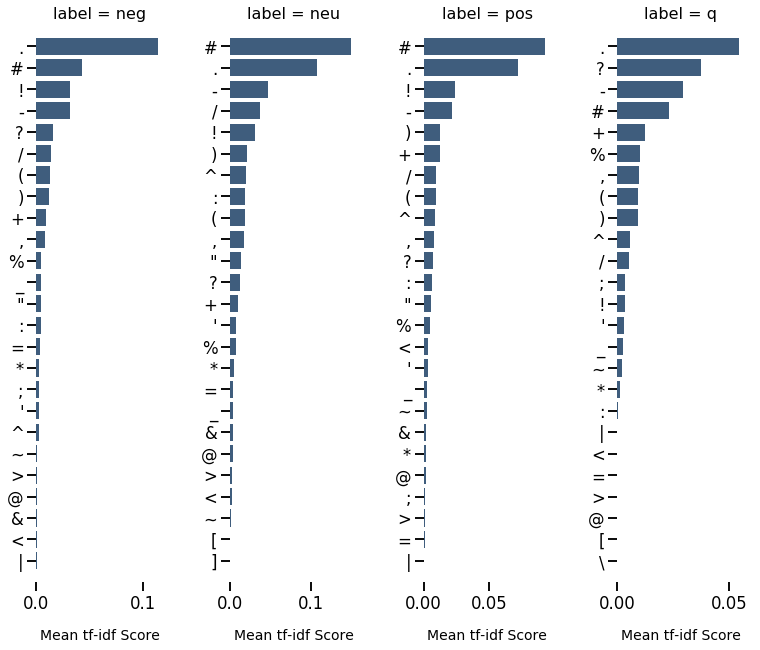

In [43]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_punc)

### URL

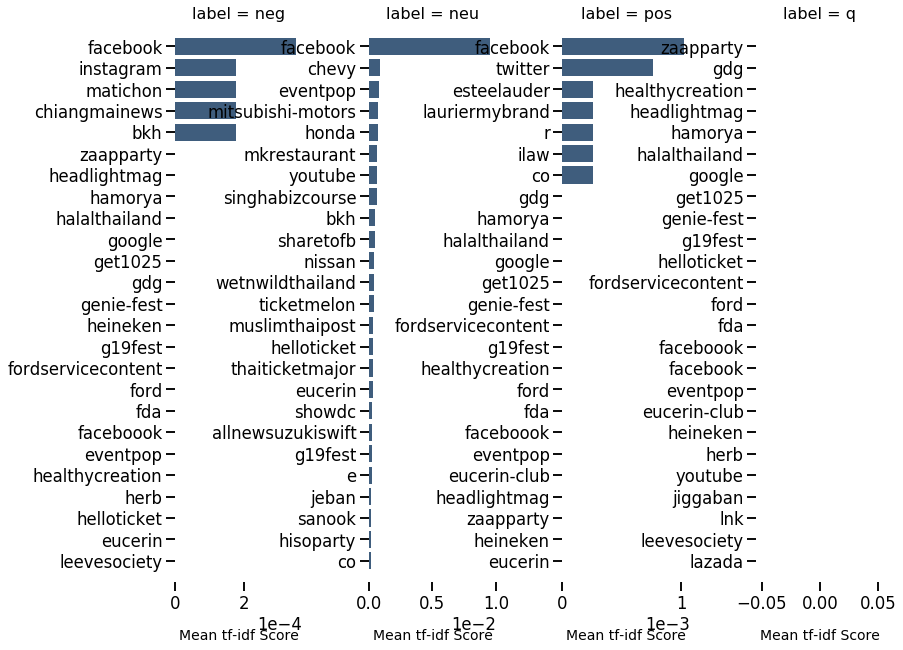

In [44]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_url)

### Hashtags

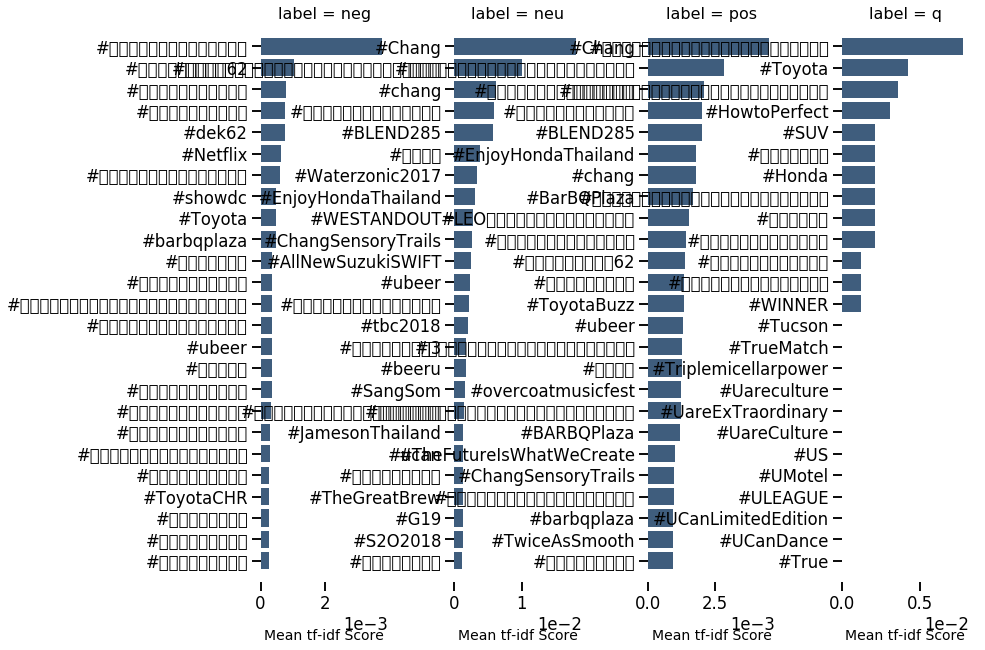

In [45]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_hashtags)

# Neutral, Positive, Negative

In [46]:
neu_df = df[df.category == "neu"].sample(5000)
neu_df.head()

category  \
5175   neu       
16023  neu       
5864   neu       
17868  neu       
17540  neu       

                                                                                                                                                                                                                                             texts  \
5175   ‡πÑ‡∏õ‡∏Å‡∏¥‡∏ô‡∏Å‡∏≤‡∏ô‡∏ô‡∏ô                                                                                                                                                                                                                                    
16023  ‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á‡∏Å‡∏π‡∏´‡∏ô‡πà‡∏≠‡∏¢                                                                                                                                                                                                                                 
5864   ‡∏Ç‡∏≠‡∏à‡∏±‡∏î‡∏î ‡πÑ‡∏°‡πà‡πÑ‡∏´‡∏ß‡∏ß‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ß‡∏á‡∏ß‚òπÔ∏è                                                                                                                                                                                                                      
17868  ‡πÄ‡∏ä‡∏∑‡∏µ‡∏≠‡∏°‡∏±‡∏ô‡πÉ‡∏ô‡∏ù‡∏µ‡∏°‡∏∑‡∏≠‡∏£‡∏∞‡∏î‡∏±‡∏ö‡πÄ‡∏ó‡∏û..‡∏£‡∏ñ‡∏£‡∏≤‡∏Ñ‡∏≤‡πÄ‡∏ó‡∏û‡πÜAccord....‡∏¢‡∏±‡∏á‡∏î‡∏µ‡∏ó‡∏∂‡πà‡πÑ‡∏°‡πà‡∏ï‡∏≤‡∏¢.....‡∏£‡∏±‡∏ö‡πÑ‡∏õ‡∏ò‡∏∏‡∏£‡∏∞‡∏Å‡∏¥‡∏à100‡∏•‡πâ‡∏≤‡∏ô‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏Å‡∏ß‡πà‡∏≤‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï..‡∏°‡∏µ‡πÄ‡∏á‡∏¥‡∏ô‡∏à‡πà‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏±‡∏ö...‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏£‡πâ‡∏ß‡πÄ‡∏Å‡∏¥‡∏ô‡∏Å‡∏≥‡∏´‡∏ô‡∏î..‡∏û‡∏ß‡∏Å‡πÄ‡∏Ç‡∏≤‡πÑ‡∏°‡πà‡πÅ‡∏Ñ‡∏£‡πà...‡πÅ‡∏ï‡πà‡πÄ‡∏Å‡∏∑‡∏≠‡∏ö‡∏à‡∏∞‡πÑ‡∏î‡πâ‡πÑ‡∏õ‡πÄ‡∏ù‡πâ‡∏≤..‡∏¢‡∏°‡∏†‡∏ö‡∏≤‡∏•..‡πÅ‡∏ó‡∏ô...‡∏Ñ‡∏±‡∏ô‡∏ï‡πà‡∏≠‡πÑ‡∏õ.‡∏Ç‡∏≠‡πÉ‡∏´‡πâ‡πÄ‡∏£‡πâ‡∏ß‡∏Å‡∏ß‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏≠‡∏µ‡∏Å‡∏ô‡πà‡∏∞...‡∏¢‡∏°‡∏ó‡∏π‡∏ï.‡∏£‡∏≠‡∏≠‡∏¢‡∏π‡πà   
17540  ‡πÇ‡∏≠‡πâ‡∏¢‡πÜ ‡πÄ‡∏à‡∏≠‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ô‡∏µ‡πâ‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏¢‡∏±‡∏á‡πÑ‡∏á‡∏≠‡πà‡∏∞ #Chang                                                                                                                                                                                                        

       length  
5175   4       
16023  3       
5864   9       
17868  68      
17540  12

In [47]:
pos_df = df[df.category == "pos"]
pos_df.head()

category  \
9   pos       
15  pos       
49  pos       
55  pos       
73  pos       

                                                                                                                                                                                                                                                    texts  \
9   ‡∏Å‡πá‡∏ô‡πà‡∏≤‡∏à‡∏∞‡∏≠‡∏£‡πà‡∏≠‡∏¢‡∏ô‡∏∞ ‡∏î‡∏π‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡πÅ‡∏•‡πâ‡∏ß ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏ô‡πà‡∏≤‡∏Å‡∏¥‡∏ô‡∏™‡∏∏‡∏î‡πÜ ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏ö‡∏≤‡∏ö‡∏µ‡∏Ñ‡∏¥‡∏ß‡∏û‡∏•‡∏≤‡∏ã‡πà‡∏≤                                                                                                                                                                                         
15  ‡πÑ‡∏°‡πà‡∏ß‡πà‡∏≤‡πÄ‡∏°‡∏ô‡∏π‡πÑ‡∏´‡∏ô‡∏Ç‡∏≠‡∏áBarBQ Plaza ‡∏Å‡πá‡∏≠‡∏£‡πà‡∏≠‡∏¢‡∏ñ‡∏π‡∏Å‡πÉ‡∏à‡∏ó‡∏±‡πâ‡∏á‡∏ô‡∏±‡πâ‡∏ôüòâ‡∏¢‡∏¥‡πà‡∏á‡∏ä‡πà‡∏ß‡∏á‡∏ß‡∏±‡∏ô‡∏´‡∏¢‡∏∏‡∏î‡πÄ‡∏ß‡∏•‡∏≤‡∏î‡∏µ‡∏î‡∏µ‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡∏π‡πà‡∏Å‡∏±‡∏ö‡∏Ñ‡∏£‡∏≠‡∏ö‡∏Ñ‡∏£‡∏±‡∏ß‡πÑ‡∏î‡πâ‡∏ó‡∏≤‡∏ô‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏≠‡∏£‡πà‡∏≠‡∏¢‡πÜ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏´‡∏ô‡πâ‡∏≤‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏ï‡∏≤‡∏Ñ‡∏á‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∏‡∏Ç‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‚Ä¢‡∏ñ‡πâ‡∏≤‡πÑ‡∏î‡πâ‡∏£‡∏≤‡∏á‡∏ß‡∏±‡∏•‡∏à‡∏∞‡∏™‡∏±‡πà‡∏á‡∏ä‡∏∏‡∏î‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏Ñ‡πà‡∏∞ ‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏°‡∏ô‡∏π‡πÉ‡∏´‡πâ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Ñ‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏•‡∏≤‡πÅ‡∏ã‡∏•‡∏°‡∏≠‡∏ô‡∏ô‡∏≠‡∏£‡πå‡πÄ‡∏ß‡∏£‡πå ‡∏õ‡∏•.‡∏¢‡∏¥‡πà‡∏á‡πÑ‡∏î‡πâ‡∏£‡∏≤‡∏á‡∏ß‡∏±‡∏•‡∏¢‡∏¥‡πà‡∏á‡πÅ‡∏Æ‡∏õ‡∏õ‡∏µ‡πâ‡∏Ñ‡πà‡∏∞üêâ   
49  ‡∏≠‡∏¢‡∏≤‡∏Å‡∏Å‡∏¥‡∏ô‡∏ô‡∏ô‡∏ô                                                                                                                                                                                                                                              
55  ‡πÑ‡∏°‡πà‡∏£‡∏∏‡πâ‡∏ß‡πà‡∏≤‡πÄ‡∏•‡∏¢‡∏•‡∏î‡∏°‡πâ‡∏∞                                                                                                                                                                                                                                       
73  ‡∏≠‡∏¢‡∏≤‡∏Å‡πÑ‡∏õ‡∏ß‡∏¥‡πà‡∏á‡∏Å‡∏±‡∏ö VINAI ‡∏≠‡∏µ‡∏Å ‡∏ß‡∏±‡∏ô‡∏ô‡∏±‡πâ‡∏ô‡∏â‡∏±‡∏ô‡∏à‡∏∞‡∏ß‡∏¥‡πà‡∏á‡πÄ‡∏Ç‡πâ‡∏≤‡∏õ‡πà‡∏≤555 ‡∏£‡∏±‡∏ö‡∏•‡∏≠‡∏á‡∏ß‡∏¥‡πà‡∏á‡πÅ‡∏ô‡πà‡∏á‡∏≤‡∏ô‡∏ô‡∏µ‡πâ‡∏û‡∏µ‡πà ‡πÑ‡∏õ‡∏Å‡∏±‡∏ô #BangkokOfDreams #BLEND285 #Findyourjoy #‡πÉ‡∏ä‡πâ‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡πÉ‡∏´‡πâ‡∏Å‡∏•‡∏°‡∏Å‡∏•‡πà‡∏≠‡∏°                                                                                                            

    length  
9   19      
15  64      
49  3       
55  6       
73  42

In [48]:
neg_df = df[df.category == 'neg']
neg_df.head()

category  \
1   neg       
14  neg       
17  neg       
20  neg       
28  neg       

                                                                                                                                        texts  \
1   ‡∏Ç‡∏±‡∏ö‡∏≠‡∏±‡∏•‡∏ï‡∏¥‡∏™1.8/141‡∏°‡πâ‡∏≤ ‡∏ö‡∏≤‡∏á‡∏ó‡∏µ‡πÄ‡∏à‡∏≠‡∏Å‡∏∞‡∏ö‡∏∞‡∏Å‡∏∞‡∏û‡∏£‡∏¥‡∏ö‡πÑ‡∏ü‡πÉ‡∏£‡πà‡∏ï‡∏≤‡∏°‡∏´‡∏•‡∏±‡∏á ‡∏´‡∏£‡∏∑‡∏≠‡∏ö‡∏≤‡∏á‡∏ó‡∏µ‡∏Å‡∏∞‡∏ö‡∏∞‡πÅ‡∏Ç‡πà‡∏á‡∏Å‡∏±‡∏ô‡∏°‡∏≤‡∏û‡∏≠‡πÄ‡∏£‡∏≤‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏î‡∏π‡∏°‡∏±‡πà‡∏á‡πÑ‡∏°‡πà‡πÄ‡∏´‡πá‡∏ô‡πÉ‡∏Ñ‡∏£‡∏ï‡∏≤‡∏°‡∏°‡∏≤‡πÄ‡∏•‡∏¢ ‡∏û‡∏≠‡πÑ‡∏õ‡πÄ‡∏à‡∏≠‡πÄ‡∏£‡∏≤‡∏ó‡∏µ‡πà‡∏õ‡∏±‡πâ‡∏°‡∏°‡∏µ‡πÅ‡∏≠‡∏ö‡∏°‡∏≠‡∏á‡∏î‡πâ‡∏ß‡∏¢   
14  ‡∏ô‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ô‡∏Ç‡∏±‡∏ö‡∏£‡∏ñ‡πÄ‡∏£‡πá‡∏ß‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏¢‡∏π‡πà‡∏Ñ‡∏ô‡πÄ‡∏î‡∏µ‡∏¢‡∏ß ‡∏¢‡∏¥‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏≤‡∏á‡∏ó‡∏µ‡πà‡∏Ç‡∏±‡∏ö‡∏ö‡πà‡∏≠‡∏¢‡πÜ‡πÄ‡∏´‡∏¢‡∏µ‡∏¢‡∏ö‡πÑ‡∏õ‡πÄ‡∏•‡∏¢ 100-120 ‡∏ï‡πà‡∏≠‡πÑ‡∏õ‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡πÑ‡∏°‡πà‡∏Ç‡∏±‡∏ö‡πÑ‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡∏¢‡∏≤‡∏£‡∏¥‡∏™‡∏ô‡∏µ‡πà‡∏Ñ‡∏á‡πÑ‚Ä¶                         
17  ‡∏≠‡πà‡∏≤‡∏ô‡πÄ‡∏°‡πâ‡∏ô‡∏î‡∏¥‡∏°‡∏µ‡πÄ‡∏à‡∏≠‡πÅ‡∏°‡∏•‡∏á‡∏™‡∏≤‡∏õ‡πÉ‡∏ô‡πÄ‡∏ï‡∏≤‡∏î‡πâ‡∏ß‡∏¢ ‡∏ö‡∏≤‡∏á‡∏Ñ‡∏ô‡∏Å‡πá‡πÄ‡∏à‡∏≠‡πÑ‡∏ï‡πà‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÜ                                                                                      
20  ‡∏Ç‡∏≠‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï‡∏¥‡∏ù‡∏≤‡∏Å‡∏£‡πâ‡∏≤‡∏ô‡∏Ñ‡πà‡∏∞ ‡πÉ‡∏Ñ‡∏£‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏ï‡∏Å‡∏Ç‡∏≤‡∏ß ‡∏õ‡∏ß‡∏î‡∏ó‡πâ‡∏≠‡∏á ‡∏õ‡∏ß‡∏î‡∏´‡∏•‡∏±‡∏á ‡∏£‡∏∞‡∏Ñ‡∏≤‡∏¢‡πÄ‡∏Ñ‡∏∑‡∏≠‡∏á‡πÄ‡∏ß‡∏•‡∏≤‡πÉ‡∏ä‡πâ‡∏ú‡πâ‡∏≤‡∏≠‡∏ô‡∏≤‡∏°‡∏±‡∏¢ ‡∏•‡∏≠‡∏á‡∏°‡∏≤‡πÉ‡∏ä‡πâ‡∏ö‡∏¥‡∏ß‡∏ï‡∏µ‡πâ‡∏Ñ‡∏≠‡∏°‡∏ü‡∏≠‡∏£‡πå‡∏ó‡∏™‡∏¥‡πÅ‡∏•‡πà‡∏ß‡∏à‡∏∞‡∏ï‡∏¥‡∏î‡πÉ‡∏à ‡∏™‡∏ô‡πÉ‡∏à‡∏ó‡∏±‡∏Å‡∏ó‡∏≤‡∏¢‡∏°‡∏≤‡πÄ‡∏•‡∏¢‡∏Ñ‡πâ‡∏≤    
28  ‡πÇ‡∏ö‡∏Å‡πÅ‡∏ó‡πá‡∏Å‡∏ã‡∏µ‡πà‡∏™‡∏¥‡∏ö‡∏Ñ‡∏±‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏õ‡∏ã‡∏±‡∏Å‡∏Ñ‡∏±‡∏ô                                                                                                                 

    length  
1   42      
14  33      
17  18      
20  37      
28  8

In [49]:
sentiment_df = pd.concat([neg_df, pos_df, neu_df])
sentiment_df = sentiment_df.reset_index(drop=True)
sentiment_df.groupby('category').texts.describe()

count unique  \
category                
neg       5713  5713    
neu       5000  5000    
pos       3917  3917    

                                                                                                top  \
category                                                                                              
neg       ‡∏°‡∏≤‡πÄ‡∏´‡∏≠‡∏∞ ‡πÅ‡∏™‡∏á‡πÇ‡∏™‡∏°‡∏Å‡∏±‡∏ö‡πÄ‡∏ö‡∏µ‡∏¢‡∏£‡πå‡∏ä‡πâ‡∏≤‡∏á‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ï‡∏µ‡πÑ‡∏≠‡πÄ‡∏´‡∏µ‡πâ‡∏¢55555                                               
neu       ‡∏ó‡∏µ‡∏°‡∏ô‡∏∂‡∏á‡πÄ‡∏ö‡∏µ‡∏¢‡∏£‡πå‡∏ä‡πâ‡∏≤‡∏á ‡∏≠‡∏µ‡∏Å‡∏ó‡∏µ‡∏°‡∏Å‡πá‡∏•‡∏µ‡πÇ‡∏≠ ‡πÄ‡∏°‡∏≤‡πÄ‡∏•‡∏∞‡πÄ‡∏•‡∏¢‡∏á‡∏≤‡∏ô‡∏ô‡∏µ‡πâ‡∏´‡∏ô‡πâ‡∏≤‡∏™‡∏ô‡∏≤‡∏°‡πÅ‡∏°‡∏£‡πà‡∏á‡∏ï‡∏±‡πâ‡∏á‡πÄ‡∏ï‡πä‡∏ô‡∏ó‡πå‡∏Ç‡∏≤‡∏¢‡πÄ‡∏ö‡∏µ‡∏¢‡∏£‡πå‡∏Å‡∏±‡∏ô‡πÅ‡∏£‡∏∞ ‡∏™‡∏≤‡∏™‡∏™‡∏™   
pos       ‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏î‡∏µ‡πÑ‡∏°‡πà‡πÄ‡∏õ‡∏ô‡∏ô‡∏¥‡πà‡∏ß                                                                           

         freq  
category       
neg       1    
neu       1    
pos       1

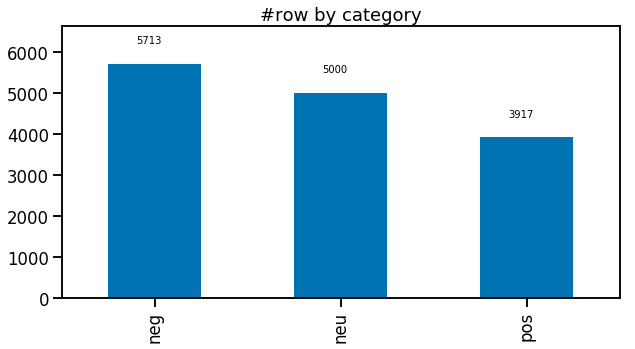

In [50]:
row_count_by_category = sentiment_df.category.value_counts()
ax = row_count_by_category.plot("bar", title="#row by category", figsize=(10, 5))
ax.set_ylim(0, row_count_by_category.max() + row_count_by_category.std())
for i, label in enumerate(row_count_by_category):
    ax.annotate(str(label), (i-0.1, label + 500))

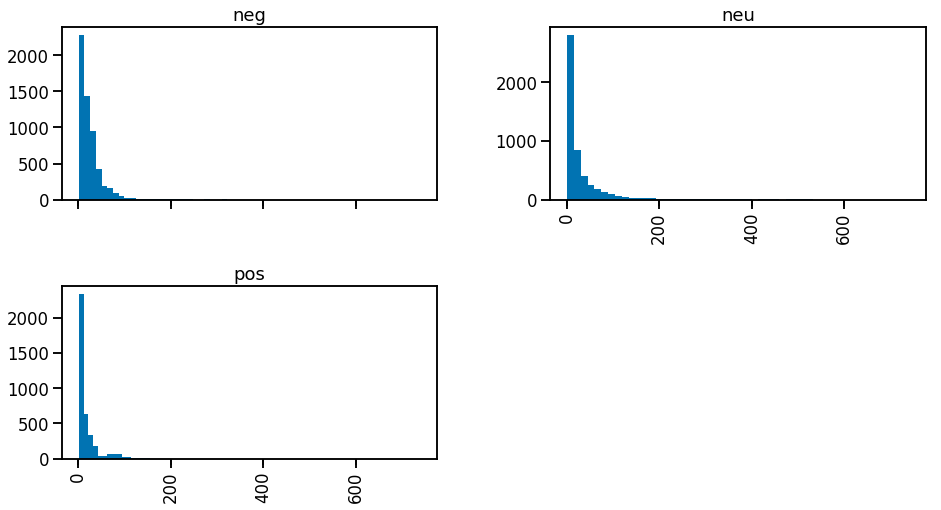

In [51]:
sentiment_df.hist(column='length', by='category', bins=50, figsize=(15, 8), sharex=True)
plt.show()

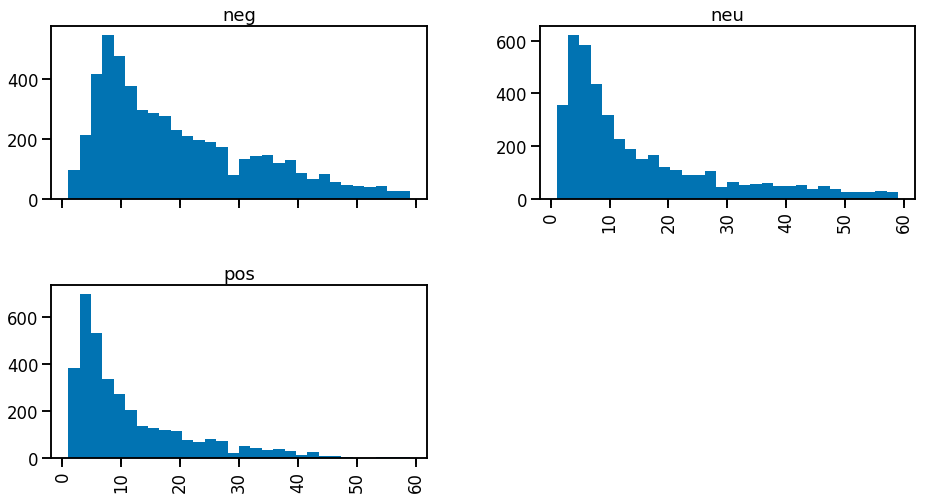

In [52]:
sentiment_df[sentiment_df.length < 60].hist(column='length', by='category', bins=30, figsize=(15, 8), sharex=True)
plt.show()

# Classification

In [56]:
class_names = np.unique(sentiment_df.category).tolist()

## Multinomial Naive Bayes (default parameters)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentiment_df['texts'], sentiment_df['category'], test_size=0.20, random_state=42)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=process_text, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=0.001)),
])

text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

0.6196172248803827

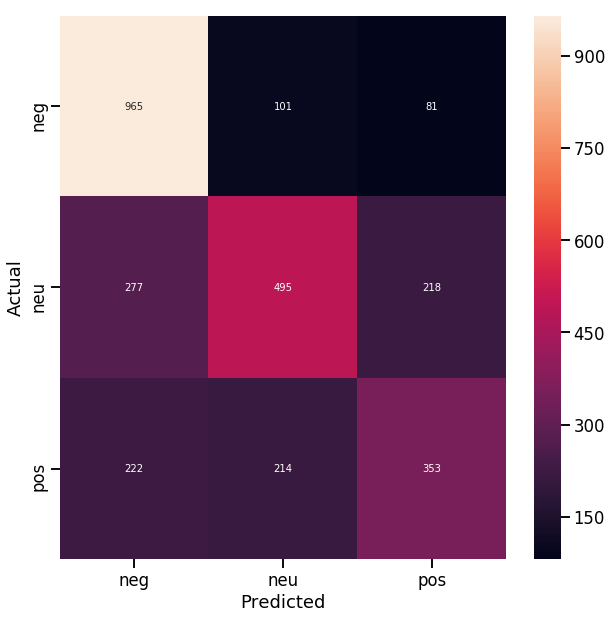

In [59]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, text_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### LIME Explainer

In [61]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [62]:
idx = sentiment_df.sample(1).index[0]

exp = explainer.explain_instance(sentiment_df.texts[idx], text_clf.predict_proba, num_features=5, top_labels=1)
exp.show_in_notebook()

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [63]:
sentiment_df.iloc[idx]

category    pos                 
texts       ‡∏≠‡∏¢‡∏≤‡∏Å‡∏Å‡∏¥‡∏ô‡πÄ‡∏≠‡∏°‡πÄ‡∏Ñ‡∏Ñ‡∏Ñ‡∏Ñ‡∏Ñ‡∏Ñ‡∏Ñ‡∏Ñ‡∏Ñ
length      8                   
Name: 7851, dtype: object

## Linear SVC (default parameters)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

svc_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=process_text, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
])

svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.6630211893369788

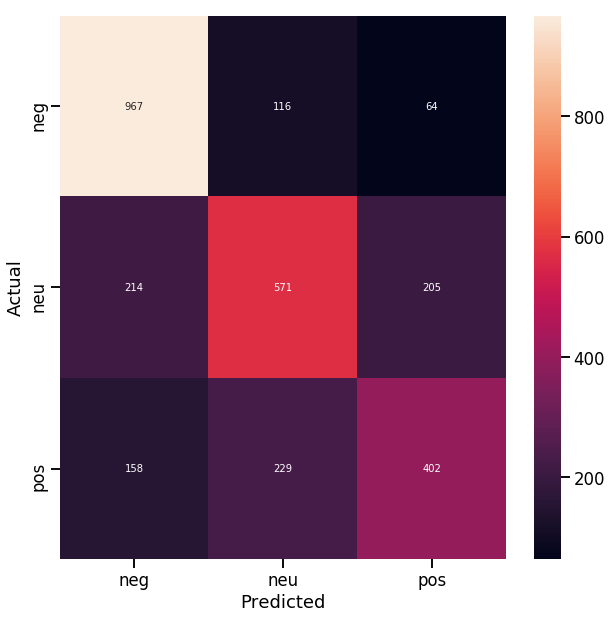

In [65]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, svc_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()